<a href="https://colab.research.google.com/github/pedro-de-bastos/CS146/blob/master/CS146_4_2_PCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigation for Dice: How do the Histograms of the Multiplication of Dice versus Addition of Dice Look Like? (Log Normal vs Normal Distributions)


(array([ 4., 13.,  0., 39.,  9., 31., 42.,  9., 34., 19.]),
 array([0.        , 0.35835189, 0.71670379, 1.07505568, 1.43340758,
        1.79175947, 2.15011136, 2.50846326, 2.86681515, 3.22516704,
        3.58351894]),
 <a list of 10 Patch objects>)

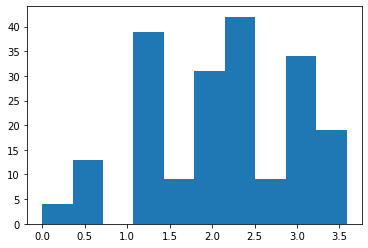

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def throw_two_dice():
  return np.random.randint(1, high=7, size=2)

def throw_many_dices(num_dices):
  dices = [[] for i in range(num_dices)]
  for i in range(num_dices):
    dices[i] = throw_two_dice()
  return np.asarray(dices)


def add_dice(dices):
  running_sum = [[] for i in range(len(dices))]
  for i, j in enumerate(dices):
    running_sum[i]=sum(j)
  return running_sum

def multiply_dice(dices):
  running_prod = [[] for i in range(len(dices))]
  for i, j in enumerate(dices):
    prod = 1
    for k in j:
      prod = prod*k
    running_prod[i] = prod
  return running_prod

dice_throws = throw_many_dices(200)
sum_dice = add_dice(dice_throws)
prod_dice = multiply_dice(dice_throws)
prod_dice = np.log(prod_dice)

#plt.hist(sum_dice)
plt.hist(prod_dice)


# PCW Question 1: Minimization Method

In [53]:
#mu, nu, alpha, beta = x0, x1, x2, x3
from scipy.optimize import minimize



def obj_fun(x):
  return (x[0]-2.3)**2+(2.75-(x[3]/(x[2]-1)))**2+(0.5-(x[3]/((x[2]-1)*x[1])))**2+(1-(x[3]**2)/(((x[2]-1)**2)*(x[2]-2)))**2

x = [5, 5, 5, 5]

result = minimize(obj_fun, x)
print(result.x)


[ 2.29999985  5.50000977  9.56249546 23.54687296]


# PCW Question 2: Solving Equations Method

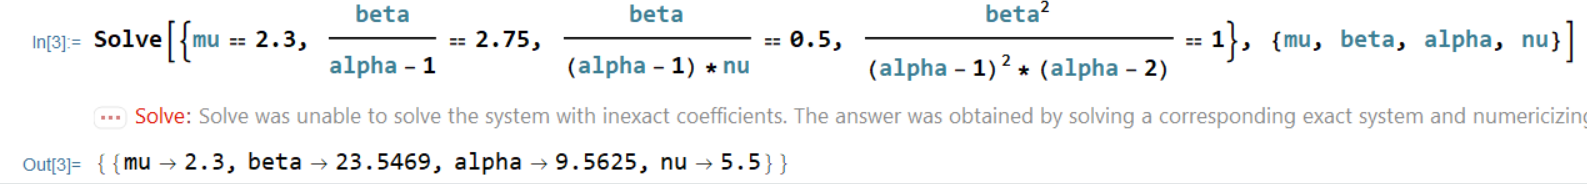